In [2]:
import os
from pathlib import Path
from operator import itemgetter
import pickle

import scanpy as sc
import numpy as np
import pandas as pd
from joblib import Parallel, delayed


import scSLAT
from scSLAT.model import run_SLAT_multi
from scSLAT.viz import build_3D, multi_Sankey

In [3]:
from importlib import reload
reload(scSLAT.viz)

<module 'scSLAT.viz' from '/flash/grp/gglab/xiacr/SLAT-dev/scSLAT/viz/__init__.py'>

In [9]:
sc.set_figure_params(dpi=100, dpi_save=300)

# Read data

In [4]:
file_path = '../../data/stereo_seq/counts/all_time_point/'
file_list = [str(file) for file in Path(file_path).iterdir() if 'filter' not in str(file)]
file_list

['../../data/stereo_seq/counts/all_time_point/count_E10.5_E1S1.MOSTA.h5ad',
 '../../data/stereo_seq/counts/all_time_point/count_E12.5_E1S1.MOSTA.h5ad',
 '../../data/stereo_seq/counts/all_time_point/count_E13.5_E1S1.MOSTA.h5ad',
 '../../data/stereo_seq/counts/all_time_point/count_E16.5_E1S1.MOSTA.h5ad',
 '../../data/stereo_seq/counts/all_time_point/count_E14.5_E1S1.MOSTA.h5ad',
 '../../data/stereo_seq/counts/all_time_point/count_E9.5_E1S1.MOSTA.h5ad',
 '../../data/stereo_seq/counts/all_time_point/count_E11.5_E1S1.MOSTA.h5ad',
 '../../data/stereo_seq/counts/all_time_point/count_E15.5_E1S1.MOSTA.h5ad']

In [8]:
data_sort = [5,0,6,1,2,4,7,3]

adata1,adata2,adata3,adata4,adata5,adata6,adata7,adata8 = Parallel(n_jobs=len(file_list)+1)\
    (delayed(sc.read_h5ad)(file) for file in itemgetter(*data_sort)(file_list))

In [54]:
adata_list = [adata1,adata2,adata3,adata4,adata5,adata6,adata7,adata8]

## Filter data

In [15]:
# filter the cells whose annotation is  'Cavity'
for adata, i in zip(adata_list, range(1,9)):
    # adata = adata[adata.obs['annotation'] != 'Cavity',:]
    exec(f'adata{i} = adata[adata.obs["annotation"] != "Cavity",:]')


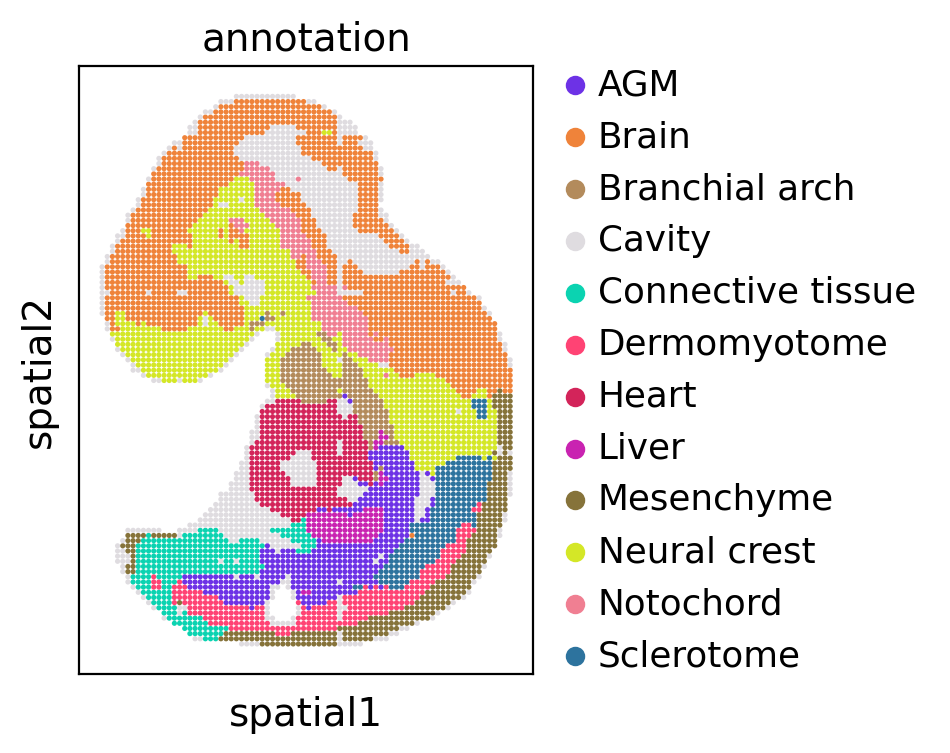

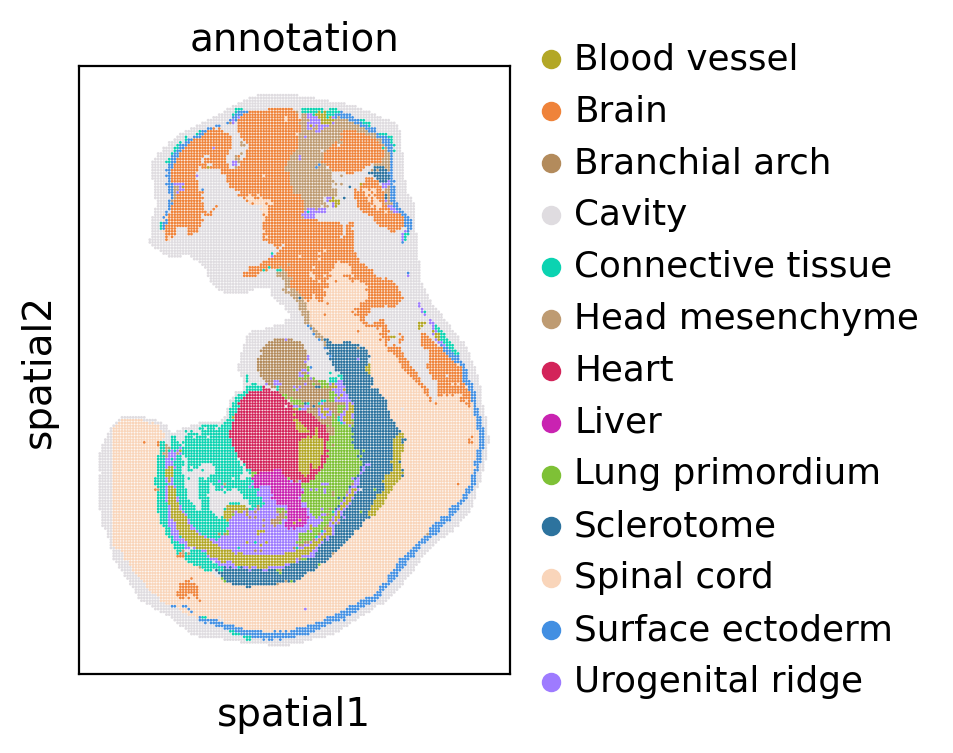

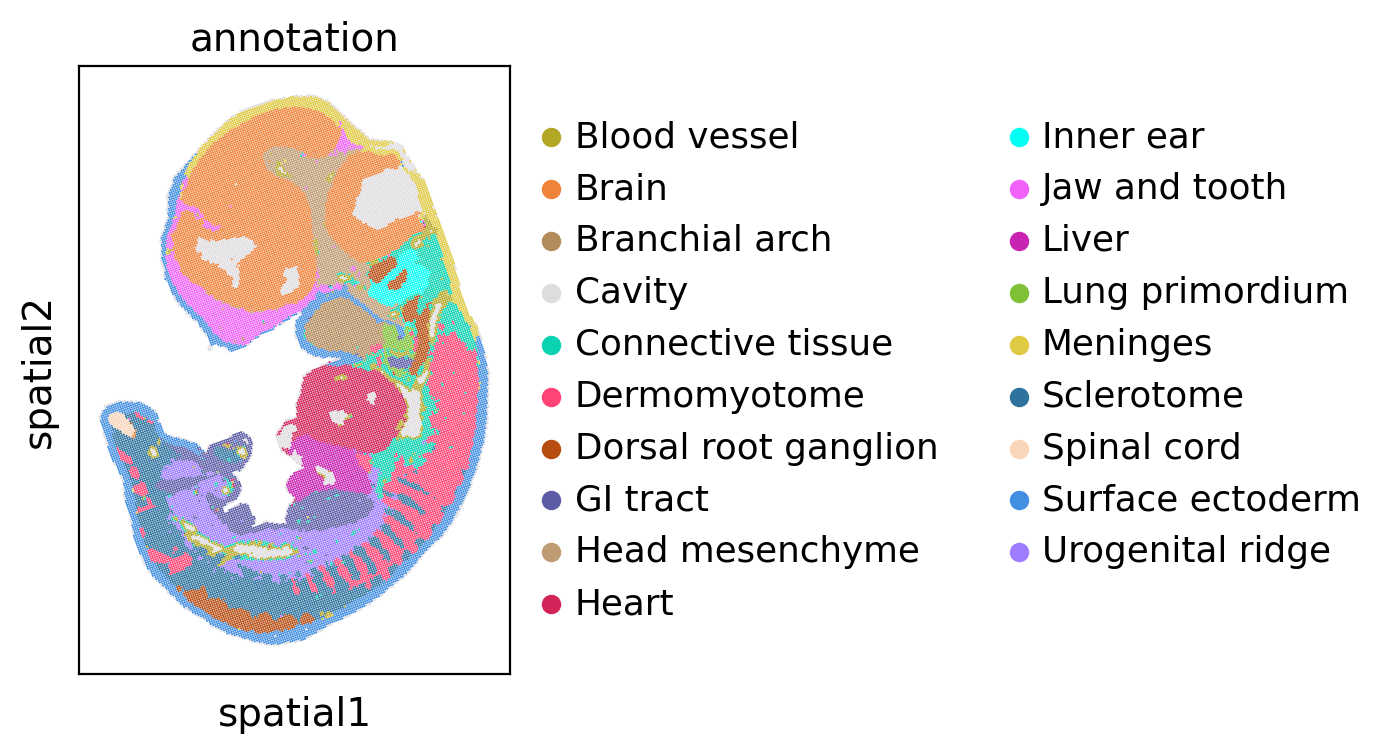

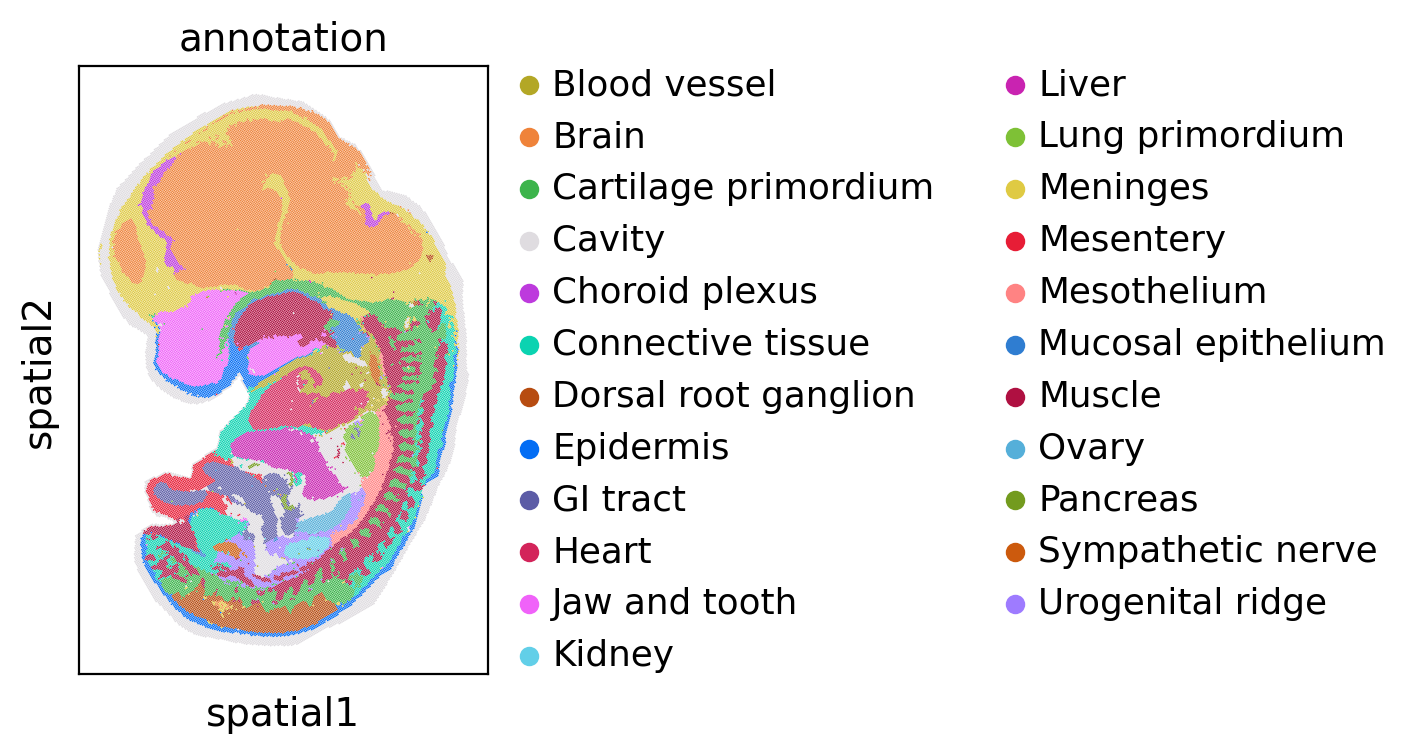

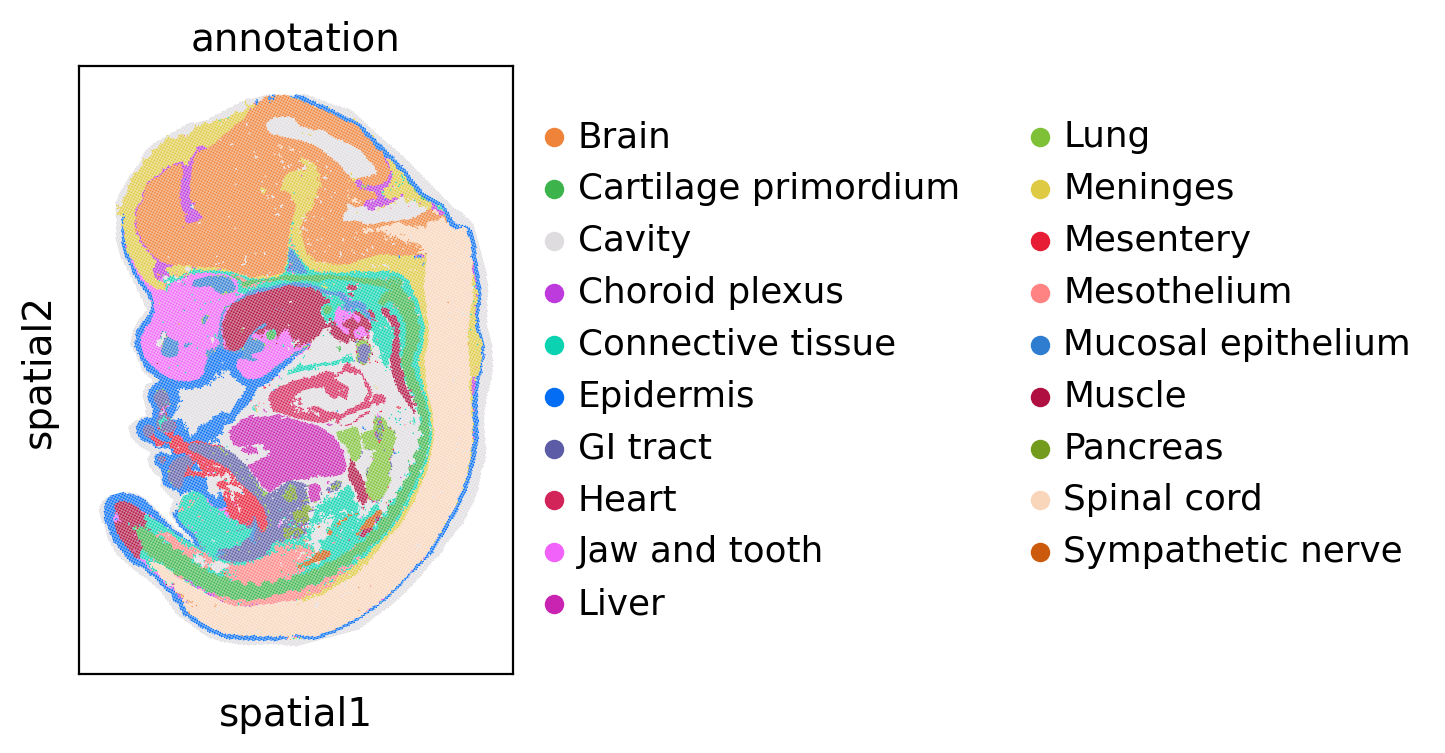

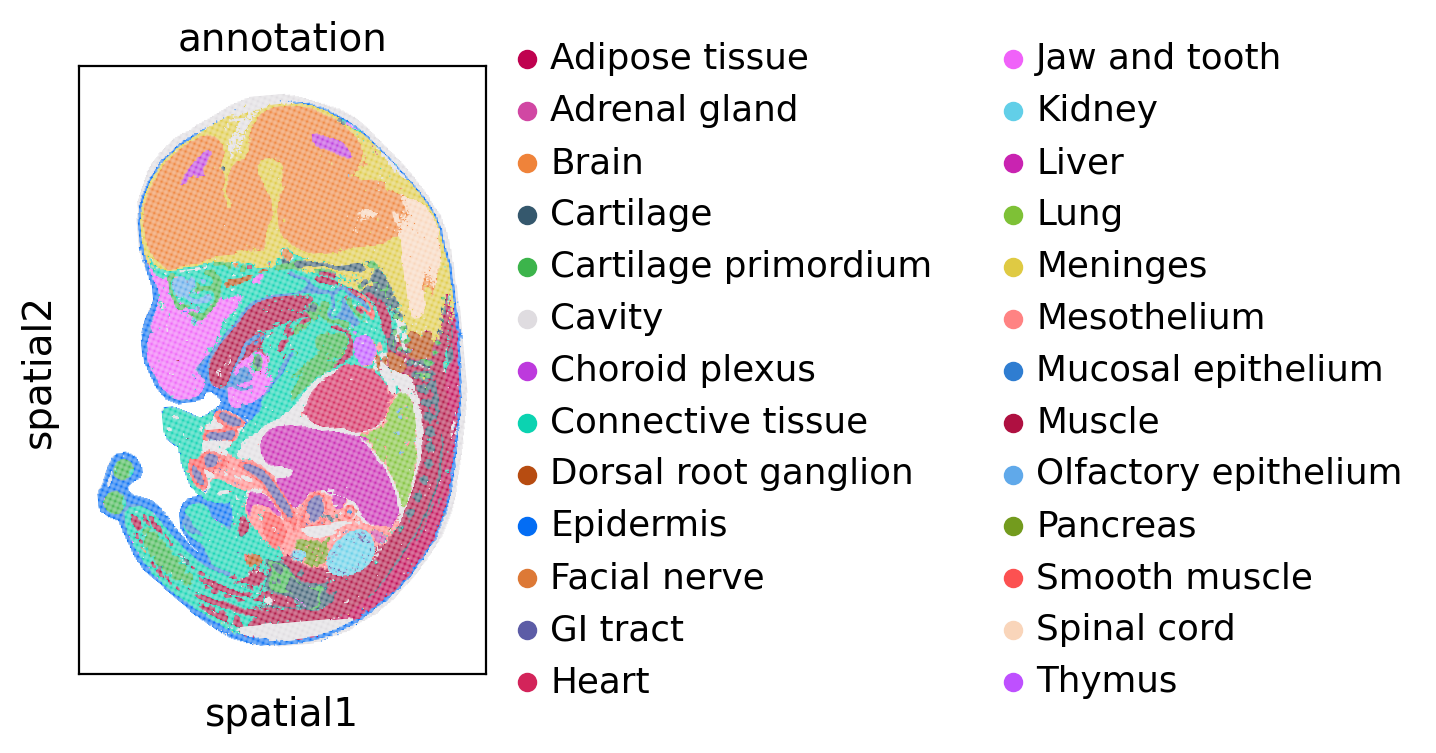

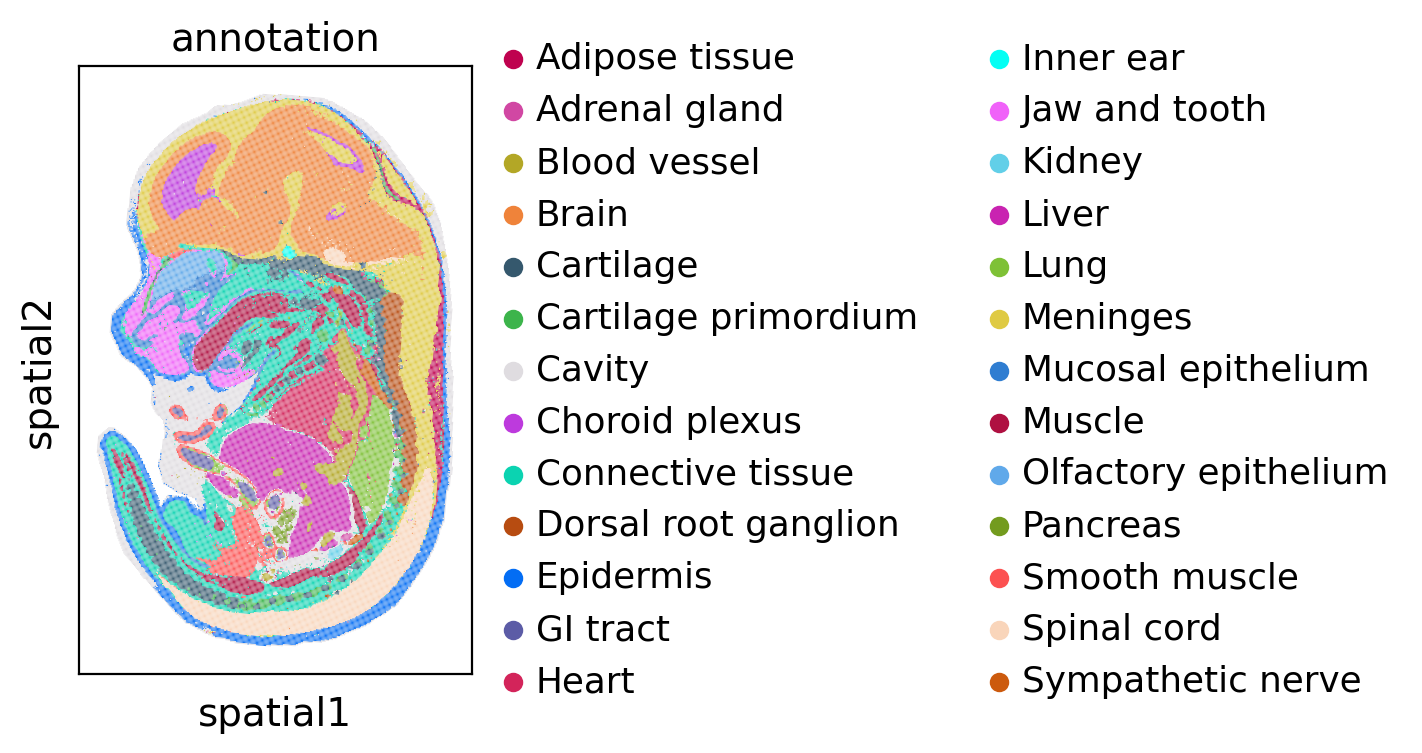

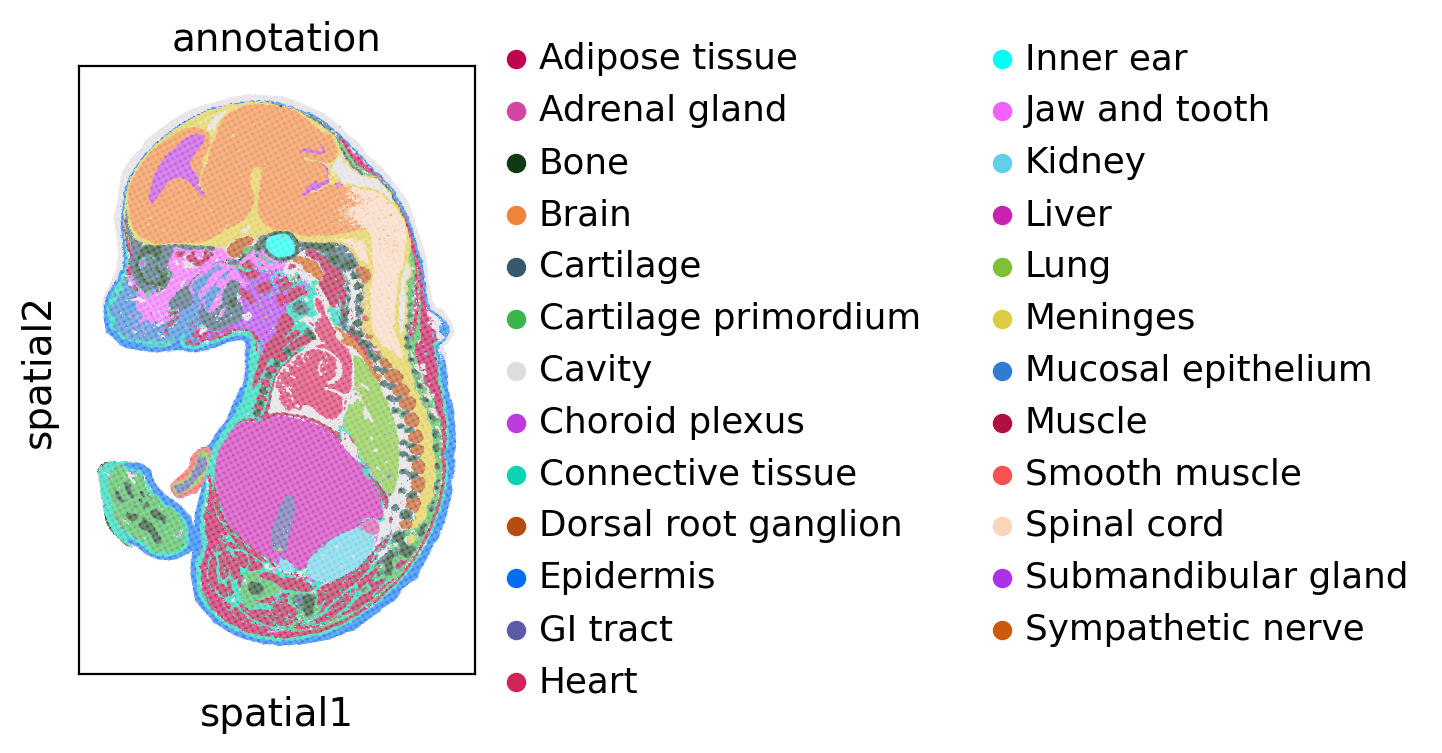

In [12]:
sc.pl.spatial(adata1, spot_size=1, color='annotation')
sc.pl.spatial(adata2, spot_size=1, color='annotation')
sc.pl.spatial(adata3, spot_size=1, color='annotation')
sc.pl.spatial(adata4, spot_size=1, color='annotation')
sc.pl.spatial(adata5, spot_size=1, color='annotation')
sc.pl.spatial(adata6, spot_size=1, color='annotation')
sc.pl.spatial(adata7, spot_size=1, color='annotation')
sc.pl.spatial(adata8, spot_size=1, color='annotation')

# Run SLAT

In [17]:
matching_list, zip_res = run_SLAT_multi(adata_list, cos_cutoff=0.6)

Calculating spatial neighbor graph ...
Calculating spatial neighbor graph ...
Calculating spatial neighbor graph ...
Calculating spatial neighbor graph ...
Calculating spatial neighbor graph ...
Calculating spatial neighbor graph ...
Calculating spatial neighbor graph ...
Calculating spatial neighbor graph ...


/lustre/grp/gglab/xiacr/SLAT/scSLAT/model/preprocess.py:58: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['Spatial_Net'] = graph_df
/lustre/grp/gglab/xiacr/SLAT/scSLAT/model/preprocess.py:58: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['Spatial_Net'] = graph_df
/lustre/grp/gglab/xiacr/SLAT/scSLAT/model/preprocess.py:58: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['Spatial_Net'] = graph_df
/lustre/grp/gglab/xiacr/SLAT/scSLAT/model/preprocess.py:58: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['Spatial_Net'] = graph_df
/lustre/grp/gglab/xiacr/SLAT/scSLAT/model/preprocess.py:58: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['Spatial_Net'] = graph_df


The graph contains 52563 edges, 5031 cells.
10.447823494335122 neighbors per cell on average.
The graph contains 144454 edges, 14042 cells.
10.287281014100556 neighbors per cell on average.
The graph contains 288416 edges, 27810 cells.
10.370945702984537 neighbors per cell on average.
The graph contains 462364 edges, 44934 cells.
10.289847331641964 neighbors per cell on average.
The graph contains 670561 edges, 64299 cells.
10.428793604877214 neighbors per cell on average.
The graph contains 1138366 edges, 110480 cells.
10.303819695872557 neighbors per cell on average.
The graph contains 1048207 edges, 101837 cells.
10.292987813859403 neighbors per cell on average.
The graph contains 966241 edges, 94021 cells.
10.276863679390775 neighbors per cell on average.
Parallel mapping dataset:1 --- dataset:2
Use DPCA feature to format graph


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


Parallel mapping dataset:2 --- dataset:3
Use DPCA feature to format graph


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


Parallel mapping dataset:3 --- dataset:4
Use DPCA feature to format graph


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


Parallel mapping dataset:4 --- dataset:5
Parallel mapping dataset:0 --- dataset:1
Use DPCA feature to format graph


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


Parallel mapping dataset:5 --- dataset:6
Use DPCA feature to format graph


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


Parallel mapping dataset:6 --- dataset:7
Use DPCA feature to format graph


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


Use DPCA feature to format graph


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Choose GPU:0 as device
Running
---------- epochs: 1 ----------
Choose GPU:5 as device
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 3.16
Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


---------- epochs: 6 ----------


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Training model time: 3.39


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Choose GPU:0 as device
Running
---------- epochs: 1 ----------


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 3.44


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!
Choose GPU:4 as device
Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 4.82
Choose GPU:0 as device
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 8.25
Choose GPU:4 as device
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
Choose GPU:3 as device
---------- epochs: 5 ----------
Running
---------- epochs: 1 -------

Mapping 0th layer 
Mapping 1th layer 
Mapping 2th layer 
Mapping 3th layer 
Mapping 4th layer 
Mapping 5th layer 
Mapping 6th layer 


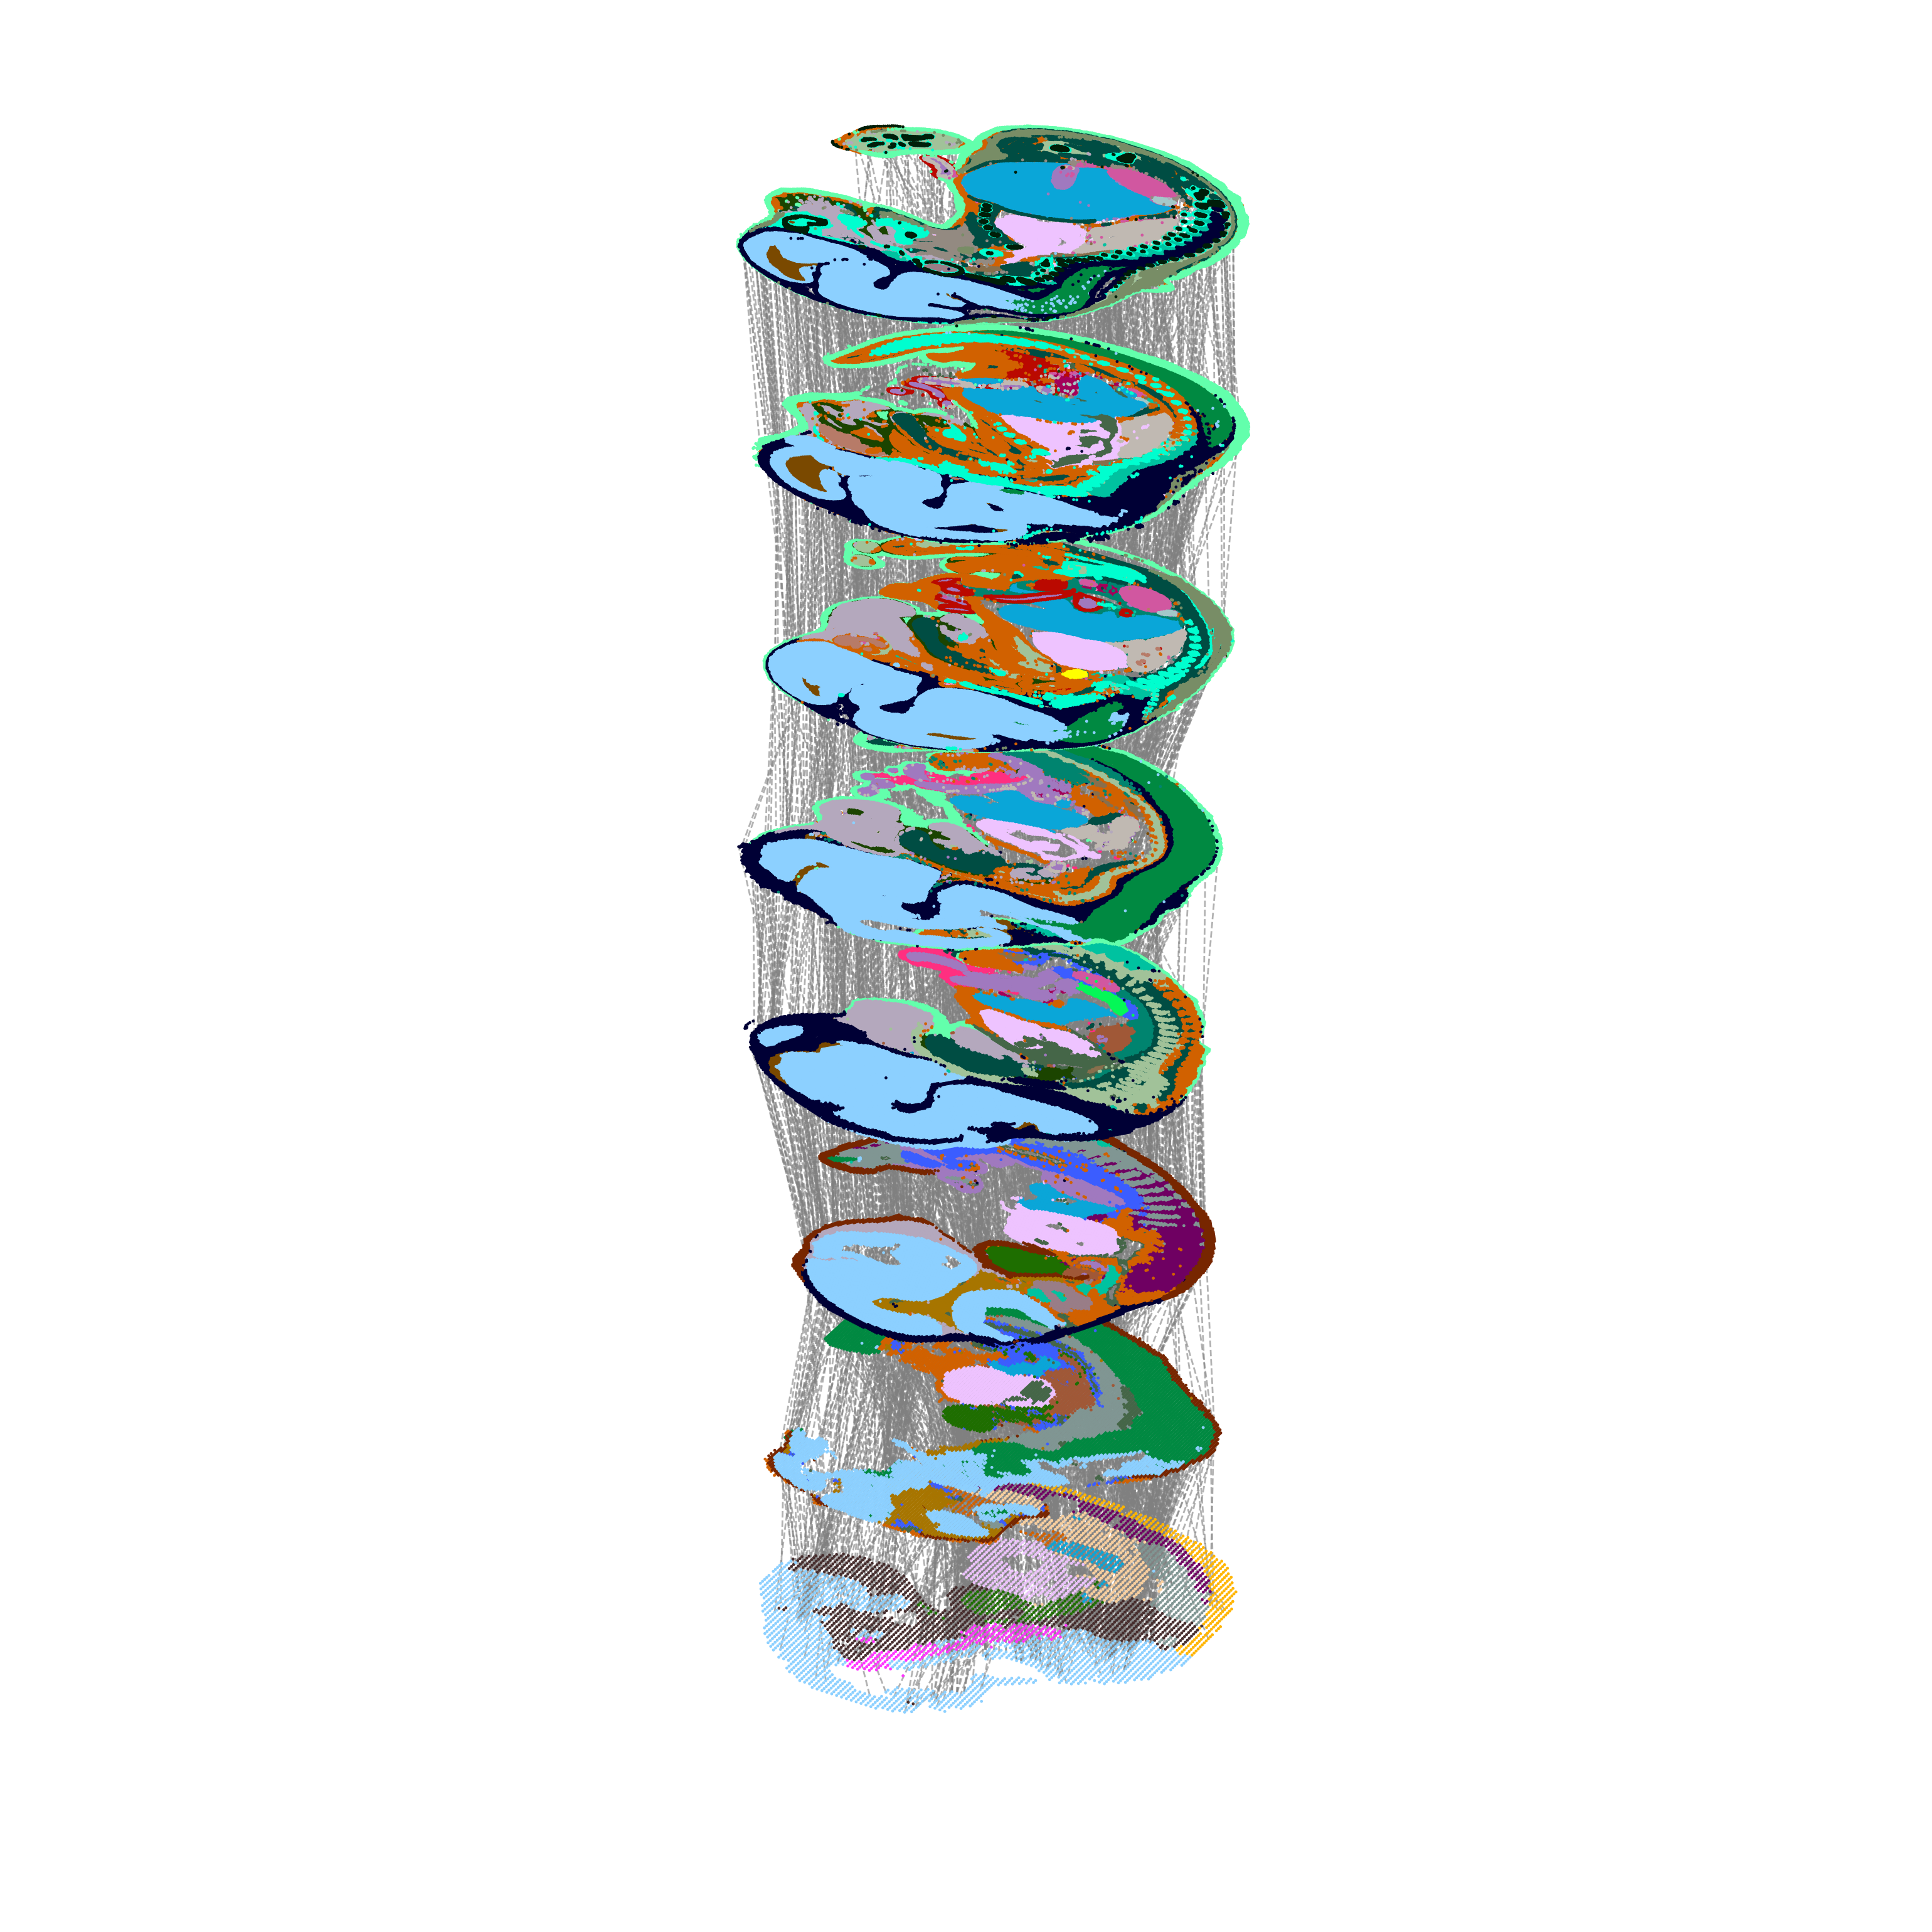

In [41]:
model = build_3D(adata_list, matching_list, subsample_size=1000)
model.draw_3D(hide_axis=True, line_color='grey', height=1, height_scale=0.5,
              size=[20,20], line_width=1, line_alpha=0.6, point_alpha=1)

In [42]:
cell_num = 0 
for adata in adata_list:
    cell_num += adata.shape[0]
print(cell_num)

462454


# Sankey

In [69]:
matching_table_list = []
for i, res in enumerate(zip_res):
    print(res[0].shape)
    adata1_df = pd.DataFrame({'index': range(adata_list[i].shape[0]),
                            'x': adata_list[i].obsm['spatial'][:,0],
                            'y': adata_list[i].obsm['spatial'][:,1],
                            'celltype': adata_list[i].obs['annotation']})
    adata2_df = pd.DataFrame({'index': range(adata_list[i+1].shape[0]),
                            'x': adata_list[i+1].obsm['spatial'][:,0],
                            'y': adata_list[i+1].obsm['spatial'][:,1],
                            'celltype': adata_list[i+1].obs['annotation']})

    matching = np.array([range(adata2_df.shape[0]), res[0]])
    
    adata2_df['target_celltype'] = adata1_df.iloc[matching[1,:],:]['celltype'].to_list()
    matching_table = adata2_df.groupby(['celltype','target_celltype']).size().unstack(fill_value=0)
    # set the number which smaller than 5% of the total number to 0
    matching_table[matching_table < adata2_df.shape[0]*0.01] = 0
    matching_table_list.append(matching_table)   

(14042,)
(27810,)
(44934,)
(64299,)
(94021,)
(101837,)
(110480,)


In [4]:
for matching_table in matching_table_list:
    sum_table = matching_table.sum().sum()
    matching_table[matching_table < sum_table*0.01] = 0

In [3]:
# with open('matching_table_list.pkl', 'wb') as f:
#     pickle.dump(matching_table_list, f)
with open('matching_table_list.pkl', 'rb') as f:
    matching_table_list = pickle.load(f)

In [37]:
from typing import List, Mapping, Optional, Union

import scanpy as sc
import numpy as np
import pandas as pd
from anndata import AnnData

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from scSLAT.viz import get_color

def multi_Sankey(matching_tables:List[pd.DataFrame],
                color:Optional[List[str]]='random',
                title:Optional[str]='Sankey plot',
                layout:Optional[List[int]]=[1300,900],
                day:Optional[float]=0,
                save_name:Optional[str]=None,
                format:Optional[str]='svg',
    ) -> None:
    r"""
    Sankey plot of celltype in multi datasets
    
    Parameters
    ----------
    matching_tables
        list of matching table
    color
        how to color the nodes, 'random' for random color, 'celltype' for color by celltype
    title
        plot title
    layout
        layout size of picture
    day
        start day of dataset for temporal order
    save_name
        save file name (None for not save)
    format
        saved picture format (see https://plotly.com/python/static-image-export/ for more details)
    """
    mappings = len(matching_tables) + 1
    prefixes = [day + i for i in range(mappings)]
    source, target, value, label_all= [], [], [], set()
    
    steps_dict = dict(zip(prefixes, np.linspace(0, 1, mappings+1)))
    # nodes
    for i, matching_table in enumerate(matching_tables):
        label_ref = [a + f'_{prefixes[i]}' for a in matching_table.columns.to_list()]
        label_query = [a + f'_{prefixes[i+1]}' for a in matching_table.index.to_list()]
        # label_all.add(label_ref)
        for i in label_ref + label_query:
            label_all.add(i)
            
    def extract_number(s):
        return float(s.split('_')[-1])
    sorted_label_all = sorted(label_all, key=extract_number)
    label_order = []
    for label in sorted_label_all:
        prefix = label.split('_')[1]
        label_order.append(steps_dict[float(prefix)])

    label2index = dict(zip(sorted_label_all, list(range(len(sorted_label_all)))))

    # link
    for matching_table, prefix in zip(matching_tables,prefixes):
        for i, query in enumerate(matching_table.index):
            for j, ref in enumerate(matching_table.columns):
                target.append(label2index[query+'_'+str(prefix+1)])
                source.append(label2index[ref+'_'+str(prefix)])
                value.append(int(matching_table.iloc[i,j]))
    
    # split label_all into celltype and day
    label_all_split = [i.split('_')[0] for i in sorted_label_all]
    if color == 'random':
        color_dict = dict(zip(set(label_all_split), get_color(len(label_all_split), cmap='tab20')))
        color_dict['Blood vessel'] = color_dict['Heart']
        color_dict['Spinal cord'] = color_dict['Brain']
        color_list = [color_dict.get(i, 'black') for i in label_all_split]
    elif color == 'celltype':
        pass

    fig = go.Figure(
                    data=[go.Sankey(node = dict(
                                                pad = 15,
                                                thickness = 15,
                                                line = dict(color="black", width=0.5),
                                                label = list(sorted_label_all),
                                                color = color_list,
                                                # x = label_order,
                                                # y = [0.5] * len(label_order),
                                                ),
                                    link = dict(source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
                                                target = target,
                                                value = value),
                                    # arrangement = "snap",
                                    )
                          ],
                    layout=go.Layout(autosize=False, width=layout[0], height=layout[1])
                   )

    fig.update_layout(title_text=title, font_size=10)
    if save_name != None:
        fig.write_image(save_name + f'.{format}', width=layout[0], height=layout[1])
    fig.show()

multi_Sankey(matching_table_list, day=9.5, layout=[2000, 1100])

In [5]:
unique_list = ['home0', 'page_a0', 'page_b0', 'page_a1', 'page_b1', 
               'page_c1', 'page_b2', 'page_a2', 'page_c2', 'page_c3']
sources = [0, 0, 1, 2, 2, 3, 3, 4, 4, 7, 6]
targets = [3, 4, 4, 3, 5, 6, 8, 7, 8, 9, 9]
values = [2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2]


def nodify(node_names):
    node_names = unique_list
    # uniqe name endings
    ends = sorted(list(set([e[-1] for e in node_names])))
    
    # intervals
    steps = 1/len(ends)

    # x-values for each unique name ending
    # for input as node position
    nodes_x = {}
    xVal = 0
    for e in ends:
        nodes_x[str(e)] = xVal
        xVal += steps

    # x and y values in list form
    x_values = [nodes_x[n[-1]] for n in node_names]
    y_values = [0.1]*len(x_values)
    
    return x_values, y_values

nodified = nodify(node_names=unique_list)
nodified

([0, 0, 0, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.75],
 [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [77]:
multi_Sankey(matching_table_list, day=9.5, layout=[1600, 1000])